# Assignment: Fashion MNIST
## Week 6 Assignment
### Ravi Kasarla
```
Creation Date: 9-Oct-2019
Last Update Date: 13-Oct-2019
```
#### Useful Links:
1. [GAN Fashion](https://github.com/R-Suresh/GAN_fashion_MNIST)
2. [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)

In [100]:
from __future__ import print_function, division

from keras.datasets import fashion_mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

import matplotlib.pyplot as plt
import sys
import numpy as np

In [101]:
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)
latent_dim = 100

optimizer = Adam(0.0002, 0.5)

In [102]:
def build_generator(img_shape):

    model = Sequential()

    model.add(Dense(256, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    #model.add(Dense(2048))
    #model.add(LeakyReLU(alpha=0.2))
    #model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(np.prod(img_shape), activation='tanh'))
    model.add(Reshape(img_shape))

    model.summary()

    noise = Input(shape=(latent_dim,))
    img = model(noise)

    return Model(noise, img)

In [103]:
def build_discriminator(img_shape):

    model = Sequential()

    model.add(Flatten(input_shape=img_shape))
    #model.add(Dense(512))
    #model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    img = Input(shape=img_shape)
    validity = model(img)

    return Model(img, validity)

In [104]:
def train(epochs, batch_size=128, sample_interval=50):

    # Load the dataset
    (X_train, _), (_, _) = fashion_mnist.load_data()

    # Rescale -1 to 1
    X_train = X_train / 127.5 - 1.
    X_train = np.expand_dims(X_train, axis=3)

    # Adversarial ground truths
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):

        # ---------------------
        #  Train Discriminator
        # ---------------------

        # Select a random batch of images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        noise = np.random.normal(0, 1, (batch_size, latent_dim))

        # Generate a batch of new images
        gen_imgs = generator.predict(noise)

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(imgs, valid)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train Generator
        # ---------------------

        noise = np.random.normal(0, 1, (batch_size, latent_dim))

        # Train the generator (to have the discriminator label samples as valid)
        g_loss = combined.train_on_batch(noise, valid)

        # Plot the progress
        print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

        # If at save interval => save generated image samples
        if epoch % sample_interval == 0:
            sample_images(epoch)

In [105]:
def sample_images(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    gen_imgs = generator.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
#     fig.savefig("images/%d.png" % epoch)
    plt.show()
    plt.close()

In [106]:
# # Build and compile the discriminator
# discriminator = build_discriminator()
# discriminator.compile(loss='binary_crossentropy',
#     optimizer=optimizer,
#     metrics=['accuracy'])

# # Build the generator
# generator = build_generator()

# # The generator takes noise as input and generates imgs
# z = Input(shape=(latent_dim,))
# img = generator(z)

# # For the combined model we will only train the generator
# discriminator.trainable = False

# # The discriminator takes generated images as input and determines validity
# validity = discriminator(img)

# # The combined model  (stacked generator and discriminator)
# # Trains the generator to fool the discriminator
# combined = Model(z, validity)
# combined.compile(loss='binary_crossentropy', optimizer=optimizer)

In [107]:
# gan = GAN()
# gan.train(epochs=3000, batch_size=32, sample_interval=200)

In [108]:
epochs=3000
epochs=10
batch_size=32
sample_interval=200

In [109]:
# Load the dataset
(X_train, _), (_, _) = fashion_mnist.load_data()

In [110]:
X_train.shape

(60000, 28, 28)

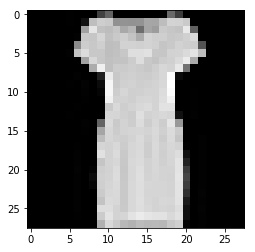

In [111]:
first_image = X_train[20]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [112]:
# Rescale -1 to 1
X_train = X_train / 127.5 - 1.
X_train = np.expand_dims(X_train, axis=3)

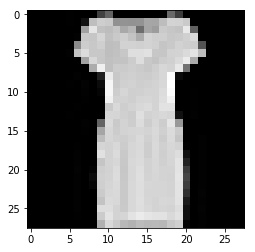

In [113]:
first_image = X_train[20]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [114]:
# Adversarial ground truths
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

In [115]:
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)
latent_dim = 100

In [116]:
optimizer = Adam(0.0002, 0.5)

In [117]:
# # Build and compile the discriminator
# discriminator = build_discriminator()
# discriminator.compile(loss='binary_crossentropy',
#     optimizer=optimizer,
#     metrics=['accuracy'])

In [118]:
def display_image(gen_imgs):
    print("display_image: Image Type:" + str(type(gen_imgs)))
    print("display_image: Image Shape:" + str(gen_imgs.shape))
    first_image = gen_imgs[20]
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

display_image: Image Type:<class 'numpy.ndarray'>
display_image: Image Shape:(32, 28, 28, 1)


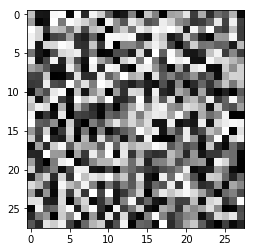

0 [D loss: 0.002635, acc.: 100.00%] [G loss: 0.064188]


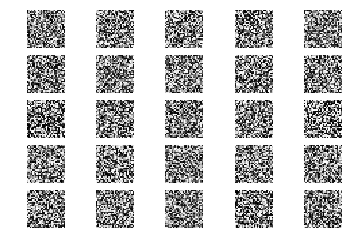

display_image: Image Type:<class 'numpy.ndarray'>
display_image: Image Shape:(32, 28, 28, 1)


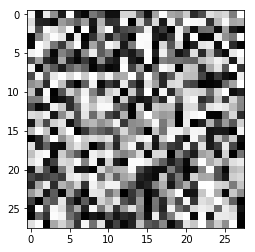

1 [D loss: 0.002348, acc.: 100.00%] [G loss: 0.064076]
display_image: Image Type:<class 'numpy.ndarray'>
display_image: Image Shape:(32, 28, 28, 1)


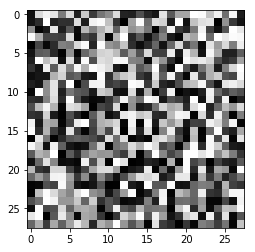

2 [D loss: 0.002235, acc.: 100.00%] [G loss: 0.058009]
display_image: Image Type:<class 'numpy.ndarray'>
display_image: Image Shape:(32, 28, 28, 1)


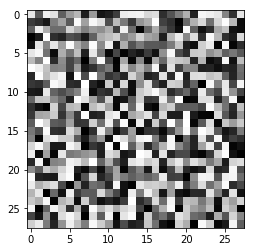

3 [D loss: 0.002082, acc.: 100.00%] [G loss: 0.051925]
display_image: Image Type:<class 'numpy.ndarray'>
display_image: Image Shape:(32, 28, 28, 1)


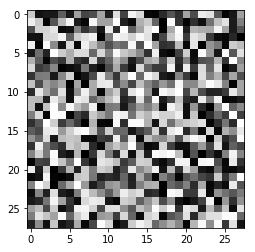

4 [D loss: 0.002006, acc.: 100.00%] [G loss: 0.056204]
display_image: Image Type:<class 'numpy.ndarray'>
display_image: Image Shape:(32, 28, 28, 1)


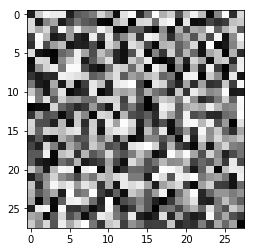

5 [D loss: 0.002160, acc.: 100.00%] [G loss: 0.044293]
display_image: Image Type:<class 'numpy.ndarray'>
display_image: Image Shape:(32, 28, 28, 1)


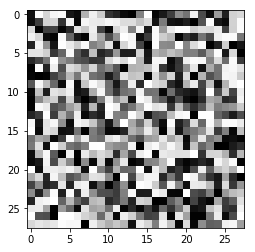

6 [D loss: 0.002731, acc.: 100.00%] [G loss: 0.051001]
display_image: Image Type:<class 'numpy.ndarray'>
display_image: Image Shape:(32, 28, 28, 1)


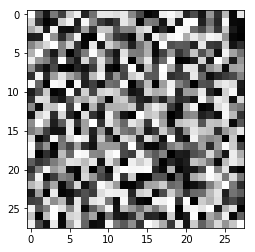

7 [D loss: 0.002248, acc.: 100.00%] [G loss: 0.048797]
display_image: Image Type:<class 'numpy.ndarray'>
display_image: Image Shape:(32, 28, 28, 1)


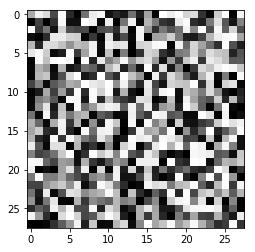

8 [D loss: 0.002139, acc.: 100.00%] [G loss: 0.057547]
display_image: Image Type:<class 'numpy.ndarray'>
display_image: Image Shape:(32, 28, 28, 1)


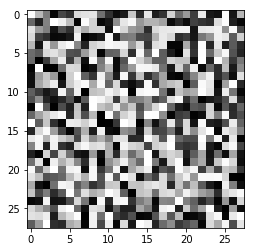

9 [D loss: 0.001910, acc.: 100.00%] [G loss: 0.056277]


In [119]:
for epoch in range(epochs):

    # ---------------------
    #  Train Discriminator
    # ---------------------

    # Select a random batch of images
    # idx = np.random.randint(0, X_train.shape[0], batch_size)
    idx = np.random.randint(0, 10, batch_size)
    imgs = X_train[idx]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Generate a batch of new images
    gen_imgs = generator.predict(noise)
    display_image(gen_imgs)

    # Train the discriminator
    d_loss_real = discriminator.train_on_batch(imgs, valid)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # ---------------------
    #  Train Generator
    # ---------------------

    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Train the generator (to have the discriminator label samples as valid)
    g_loss = combined.train_on_batch(noise, valid)

    # Plot the progress
    print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

    # If at save interval => save generated image samples
    if epoch % sample_interval == 0:
        sample_images(epoch)

0 [D loss: 0.003650, acc.: 100.00%] [G loss: 0.047826]


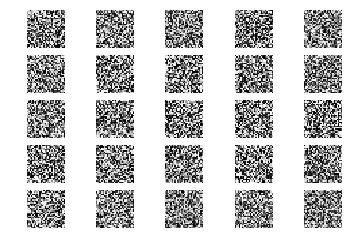

1 [D loss: 0.002272, acc.: 100.00%] [G loss: 0.047828]
2 [D loss: 0.002272, acc.: 100.00%] [G loss: 0.049959]
3 [D loss: 0.002640, acc.: 100.00%] [G loss: 0.045907]
4 [D loss: 0.002876, acc.: 100.00%] [G loss: 0.044548]
5 [D loss: 0.002663, acc.: 100.00%] [G loss: 0.045832]
6 [D loss: 0.002323, acc.: 100.00%] [G loss: 0.042371]
7 [D loss: 0.009164, acc.: 99.61%] [G loss: 0.045142]
8 [D loss: 0.001973, acc.: 100.00%] [G loss: 0.038825]
9 [D loss: 0.001791, acc.: 100.00%] [G loss: 0.043101]
10 [D loss: 0.002768, acc.: 100.00%] [G loss: 0.040062]
11 [D loss: 0.001734, acc.: 100.00%] [G loss: 0.038813]
12 [D loss: 0.001930, acc.: 100.00%] [G loss: 0.036373]
13 [D loss: 0.002463, acc.: 100.00%] [G loss: 0.033574]
14 [D loss: 0.001561, acc.: 100.00%] [G loss: 0.038220]
15 [D loss: 0.001929, acc.: 100.00%] [G loss: 0.038060]
16 [D loss: 0.001626, acc.: 100.00%] [G loss: 0.039575]
17 [D loss: 0.001919, acc.: 100.00%] [G loss: 0.034988]
18 [D loss: 0.005596, acc.: 99.61%] [G loss: 0.035912]
19 

In [120]:
train(30)

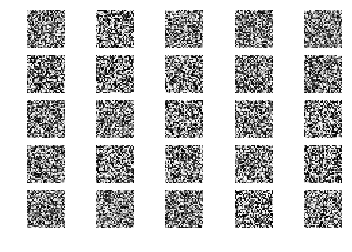

In [123]:
sample_images(200)